In [208]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification, make_gaussian_quantiles, make_moons, make_blobs
import matplotlib.pyplot as plt
import time
from sklearn.linear_model import LogisticRegression

In [3]:
data = pd.read_csv("adult.data", delimiter=", ", engine='python', names=['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex',
                                                                         'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'])

In [4]:
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [11]:
temp = data[["age", "fnlwgt", "education-num", "income"]].copy()
temp["income"] = (temp.income==">50K").astype('int')
y = temp[["income"]].values
X = temp[["age", "fnlwgt", "education-num"]].copy().to_numpy()

## sklearn data

In [204]:
#easy to separate
samp = 100000
X, y = make_blobs(n_samples = samp, n_features=2, random_state=42)

In [196]:
def plot_data(X, y):
    fig, ax = plt.subplots(figsize = (8,6))
    X1 = X[:, 0][y==0]
    y1 = X[:, 1][y==0]
    X2 = X[:, 0][y==1]
    y2 = X[:, 1][y==1]
    plt.plot(X1, y1, 'o')
    plt.plot(X2, y2, '^')

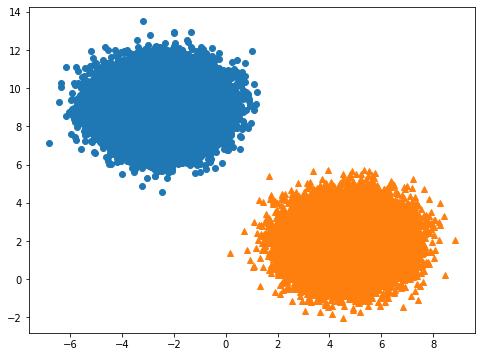

In [197]:
plot_data(X, y)

In [198]:
#slightly harder to separate
X, y = make_moons(n_samples = samp, noise = .75, random_state = 42)

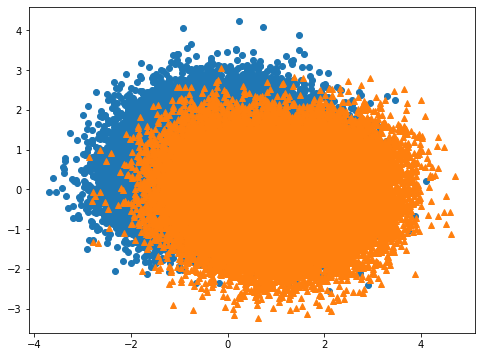

In [199]:
plot_data(X, y)

In [200]:
#extreme hard case
X, y = make_gaussian_quantiles(n_samples = samp, n_features=2, n_classes=2, random_state = 42)

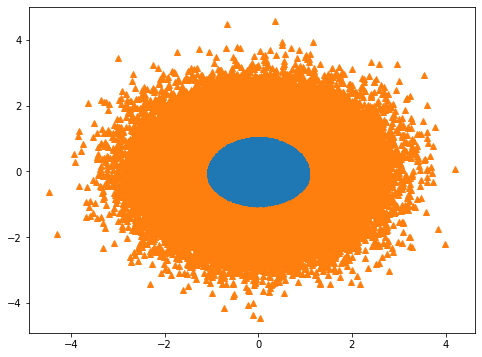

In [201]:
plot_data(X, y)

## Algorithm

In [110]:
def sigmoid(z):
    return 1.0/(1 + np.exp(-z))

In [111]:
def loss(X, y, w):
    margin = np.dot(X, w)
    
    return y * -np.logaddexp(0, np.exp(margin) + (1 - y) * (1 + np.logaddexp(0, np.exp(margin))))

In [112]:
def gradients(X, y, y_hat):
    m = X.shape[0]
    
    # Gradient of loss w.r.t weights
    dw = (1/m)*np.dot(X.T, (y_hat - y))
    
    # Gradient of loss w.r.t bias
    db = (1/m)*np.sum((y_hat - y)) 
    
    return dw, db


In [113]:
def normalize(X): 
    m, n = X.shape

    for i in range(n):
        X = (X - X.mean(axis=0))/X.std(axis=0)
        
    return X

In [114]:
def train(X, y, bs, epochs, lr):
    m, n = X.shape
    
    # Initializing weights and bias to zeros.
    w = np.zeros((n,1))
    b = 0
    
    # Reshape y.
    y = y.reshape(m,1)
    
    # Normalize inputs
    x = normalize(X)
    
    # Store losses
    losses = []
    
    # Train
    for epoch in range(epochs):
        for i in range((m-1)//bs + 1):
            
            # Defining batches for SGD (this can be changed)
            start_i = i*bs
            end_i = start_i + bs
            xb = X[start_i:end_i]
            yb = y[start_i:end_i]
            
            # Predict
            y_hat = sigmoid(np.dot(xb, w) + b)
            
            # Calculate gradients
            dw, db = gradients(xb, yb, y_hat)
            
            # Update params
            w -= lr*dw
            b -= lr*db
        
        # Calc loss
        l = loss(x, y, w)
        losses.append(l)
        
    return w, b, losses

In [115]:
def predict(X):
    
    # X --> Input.
    
    # Normalizing the inputs.
    x = normalize(X)
    
    # Calculating presictions/y_hat.
    preds = sigmoid(np.dot(X, w) + b)
    
    # if y_hat >= 0.5 --> round up to 1
    # if y_hat < 0.5 --> round up to 1
    pred_class = [1 if i > 0.5 else 0 for i in preds]
    
    return np.array(pred_class)

In [116]:
def accuracy(y, y_hat):
    accuracy = np.sum(y == y_hat) / len(y)
    return accuracy

In [205]:
# Training 
start = time.time()
w, b, l = train(X, y, bs=100, epochs=1000, lr=0.001)
end = time.time()
print(end - start)

<ipython-input-110-2837dfe2f958>:2: RuntimeWarning: overflow encountered in exp
  return 1.0/(1 + np.exp(-z))
<ipython-input-111-446f1ee1a133>:4: RuntimeWarning: overflow encountered in exp
  return y * -np.logaddexp(0, np.exp(margin) + (1 - y) * (1 + np.logaddexp(0, np.exp(margin))))
<ipython-input-111-446f1ee1a133>:4: RuntimeWarning: invalid value encountered in add
  return y * -np.logaddexp(0, np.exp(margin) + (1 - y) * (1 + np.logaddexp(0, np.exp(margin))))


35.062482833862305


In [210]:
start = time.time()
lr = LogisticRegression()
lr.fit(X, y)
end = time.time()
print(end - start)

0.8963208198547363


In [118]:
print(f'weights: {w}, beta: {b}')

weights: [[-0.00320015]
 [ 0.43884029]], beta: -0.0011334438255193532


In [119]:
l

[array([[-0.        ],
        [-0.        ],
        [-1.31406546],
        [-0.        ],
        [-0.        ],
        [-0.        ],
        [-0.        ],
        [-1.31328928],
        [-0.        ],
        [-1.313692  ],
        [-0.        ],
        [-0.        ],
        [-1.3134978 ],
        [-1.3139329 ],
        [-1.31418285],
        [-0.        ],
        [-0.        ],
        [-1.31329439],
        [-1.31341499],
        [-1.31375529],
        [-0.        ],
        [-1.3141863 ],
        [-0.        ],
        [-1.31342243],
        [-1.31420335],
        [-1.31332155],
        [-1.31359527],
        [-0.        ],
        [-0.        ],
        [-0.        ],
        [-0.        ],
        [-0.        ],
        [-1.31392485],
        [-0.        ],
        [-0.        ],
        [-0.        ],
        [-1.31399512],
        [-1.313595  ],
        [-0.        ],
        [-0.        ],
        [-1.31377402],
        [-1.31327259],
        [-1.31321365],
        [-1